In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
data = pd.read_csv('dataset/historical_data.csv')
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [124]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  str    
 2   actual_delivery_time                          197421 non-null  str    
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  str    
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                197428 non-nu

In [125]:
data["created_at"] = pd.to_datetime(data["created_at"])
data["actual_delivery_time"] = pd.to_datetime(data["actual_delivery_time"])

In [126]:
from datetime import datetime
data["delivery_duration"] = (data["actual_delivery_time"] - data["created_at"]).dt.total_seconds() / 60.0
data["busy_dasher_ratio"] = data["total_busy_dashers"]/data["total_onshift_dashers"]
data["total_non_restrauntprep_duration"] = data["estimated_store_to_consumer_driving_duration"] + data["estimated_order_place_duration"]

In [127]:
#To encode or not: 
data["market_id"].nunique() # 10 unique values, can be encoded as categorical variable


6

In [128]:
data["order_protocol"].nunique()

7

In [129]:
data["store_id"].nunique()

6743

In [130]:
#So we can encode order_protocol and market_id as categorical variables but not store_id. creating dummies:
order_protocol_dummies = pd.get_dummies(data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix("order_protocol_")
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [131]:
market_id_dummies = pd.get_dummies(data.market_id)
market_id_dummies = market_id_dummies.add_prefix("market_id_")
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [132]:
#impute null values for store_id: creating a dictionary which maps each store_id to the most frequent cuisine category:
store_id_unique = data["store_id"].unique()
store_id_and_category = {store_id : data[data.store_id == store_id].store_primary_category.mode() 
                for store_id in store_id_unique}



In [133]:
def fill(store_id):
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

data["nan_free_store_primary_category"] = data.store_id.apply(fill)


In [134]:
#one hot encoding this coloumn
store_primary_category_dummies = pd.get_dummies(data.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix("store_primary_category_")
store_primary_category_dummies.head()

,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [135]:
train_df = data.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "order_protocol", "actual_delivery_time", "nan_free_store_primary_category"])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,busy_dasher_ratio,total_non_restrauntprep_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,62.983333,0.424242,1307.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,67.066667,2.000000,1136.0
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,29.683333,0.000000,1136.0
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,51.250000,1.000000,735.0
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,39.833333,1.000000,1096.0


In [136]:
train_data = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)

In [137]:
#converting to float
train_df = train_data.astype(float)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
train_df.describe()

/Users/hafsaakhtar/Driver Delivery Prediction/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
train_df["busy_dasher_ratio"].describe()

/Users/hafsaakhtar/Driver Delivery Prediction/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dasher_ratio, dtype: float64

In [ ]:
#we are getting infinite values because it is dividing by 10. we want to check with isfinite() function:
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([ 5,  6,  7,  9, 10, 11, 12, 13]),)

In [ ]:
#replace with nan (not a number). inifnite values can cause problems for machine learning models, so we will replace them with NaN and then impute them with the mean value of the column:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop all nans
train_df.dropna(inplace=True)

In [ ]:
train_df.shape

(177070, 101)

In [ ]:
#creating a mask for the correlation matrix
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

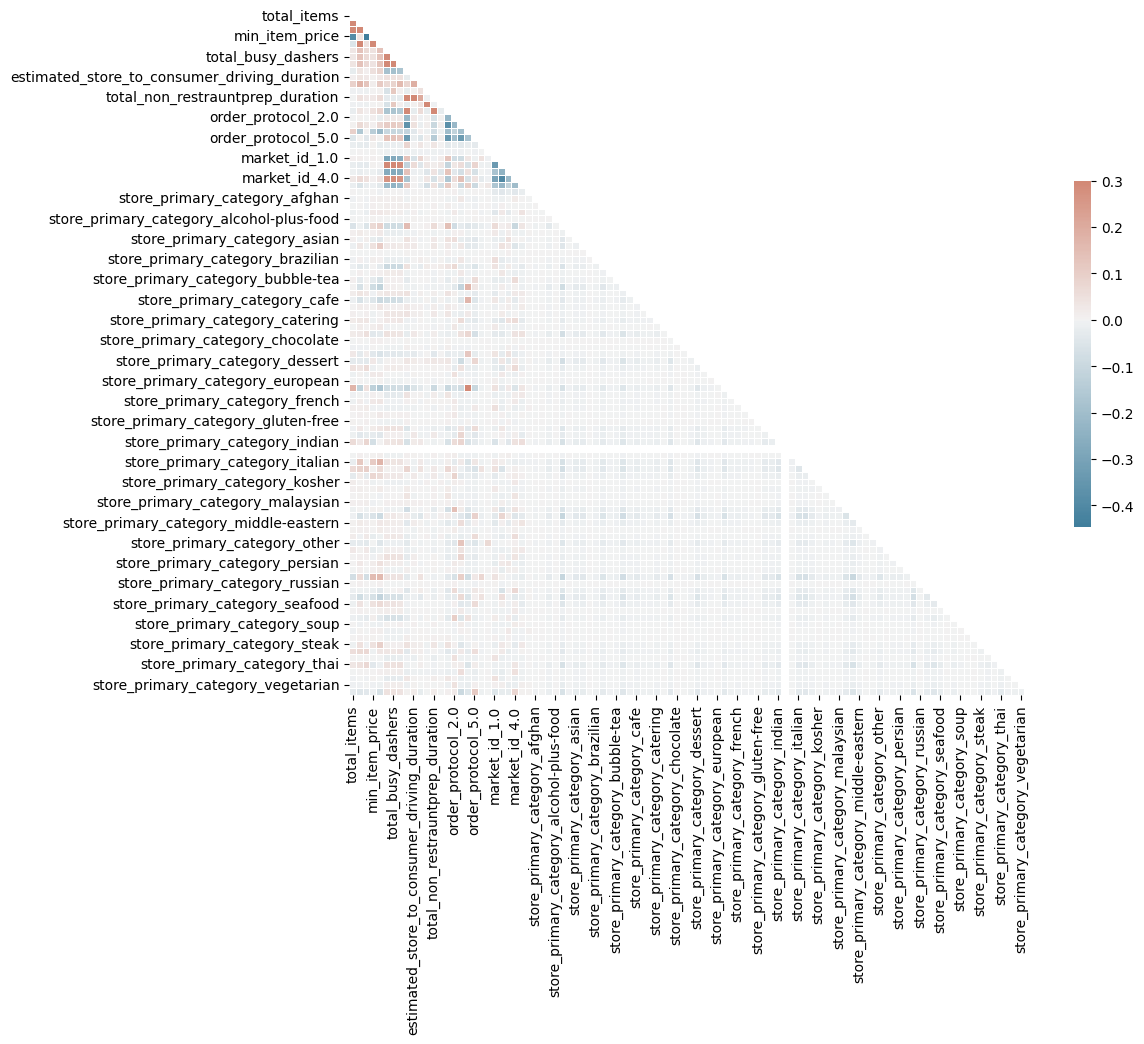

In [143]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [144]:
train_df['store_primary_category_indonesian'].describe()

count    197428.000000
mean          0.000010
std           0.003183
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: store_primary_category_indonesian, dtype: float64

In [145]:
#getting redundant values 
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


In [146]:
#getting top absolute correlations
def get_top_abs_correlations(df, n=5):
    #sorts correlations in a descending order and returns the top n
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [147]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers                  0.943789
                                              total_outstanding_orders            0.936122
total_busy_dashers                            total_outstanding_orders            0.932913
estimated_store_to_consumer_driving_duration  total_non_restrauntprep_duration    0.923613
estimated_order_place_duration                order_protocol_1.0                  0.895608
total_items                                   num_distinct_items                  0.763912
subtotal                                      num_distinct_items                  0.681101
total_items                                   subtotal                            0.558067
min_item_price                                max_item_price                      0.545484
subtotal                                      max_item_price                      0.505547
order_protocol_4.0                            store_primary_cate

In [148]:
#drop highly related features
train_df = data.drop(columns=["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time","nan_free_store_primary_category", "order_protocol"])

In [149]:
train_df['store_primary_category_indonesian'].describe()

KeyError: 'store_primary_category_indonesian'

In [150]:
#Before concat, check what's in each dataframe
print("train_df columns:", train_df.columns.tolist())
print("order_protocol_dummies columns:", order_protocol_dummies.columns.tolist())

train_df columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration', 'delivery_duration', 'busy_dasher_ratio', 'total_non_restrauntprep_duration']
order_protocol_dummies columns: ['order_protocol_1.0', 'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0']


In [151]:
# Instead of your current concat, do this:
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)

# Remove duplicate columns immediately
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

# Then drop what you need (with correct column names)
train_df = train_df.drop(columns=["store_primary_category_indonesian"], errors='ignore')

# Continue with your code
train_df = train_df.astype(float)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
#getting top absolute correlations
def get_top_abs_correlations(df, n=5):
    #sorts correlations in a descending order and returns the top n
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers                  0.941741
                                              total_outstanding_orders            0.934639
total_busy_dashers                            total_outstanding_orders            0.931295
estimated_store_to_consumer_driving_duration  total_non_restrauntprep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0                  0.897645
total_items                                   num_distinct_items                  0.758146
subtotal                                      num_distinct_items                  0.682890
total_items                                   subtotal                            0.557175
min_item_price                                max_item_price                      0.541241
subtotal                                      max_item_price                      0.507947
order_protocol_4.0                            store_primary_cate

In [155]:
train_df["present_distinct_item_of_total"] = train_df["num_distinct_items"] / train_df["total_items"]
train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]
train_df.drop(columns =["num_distinct_items", "subtotal"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))


Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers                  0.941741
                                              total_outstanding_orders            0.934639
total_busy_dashers                            total_outstanding_orders            0.931295
estimated_store_to_consumer_driving_duration  total_non_restrauntprep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0                  0.897645
min_item_price                                avg_price_per_item                  0.860580
max_item_price                                avg_price_per_item                  0.770382
min_item_price                                max_item_price                      0.541241
order_protocol_4.0                            store_primary_category_fast         0.489946
total_items                                   present_distinct_item_of_total      0.445751
                                              min_item_price    

In [162]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_store_to_consumer_driving_duration  total_non_restrauntprep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0                  0.897645
min_item_price                                avg_price_per_item                  0.860580
max_item_price                                avg_price_per_item                  0.770382
min_item_price                                max_item_price                      0.541241
order_protocol_4.0                            store_primary_category_fast         0.489946
total_items                                   present_distinct_item_of_total      0.445751
                                              min_item_price                      0.389277
order_protocol_1.0                            order_protocol_3.0                  0.373581
estimated_order_place_duration                order_protocol_3.0                  0.364170
                                              total_non_restraun

In [ ]:
train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]
train_df.drop(columns =["max_item_price", "min_item_price"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_store_to_consumer_driving_duration  total_non_restrauntprep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0                  0.897645
order_protocol_4.0                            store_primary_category_fast         0.489946
total_items                                   present_distinct_item_of_total      0.445751
order_protocol_1.0                            order_protocol_3.0                  0.373581
estimated_order_place_duration                order_protocol_3.0                  0.364170
                                              total_non_restrauntprep_duration    0.363297
order_protocol_1.0                            order_protocol_5.0                  0.342345
total_items                                   price_range_of_items                0.333304
estimated_order_place_duration                order_protocol_5.0                  0.333291
order_protocol_3.0                            order_protocol_5.0

In [164]:
train_df.drop(columns =["total_non_restrauntprep_duration"], inplace=True)

In [165]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration                order_protocol_1.0                0.897645
order_protocol_4.0                            store_primary_category_fast       0.489946
total_items                                   present_distinct_item_of_total    0.445751
order_protocol_1.0                            order_protocol_3.0                0.373581
estimated_order_place_duration                order_protocol_3.0                0.364170
order_protocol_1.0                            order_protocol_5.0                0.342345
total_items                                   price_range_of_items              0.333304
estimated_order_place_duration                order_protocol_5.0                0.333291
order_protocol_3.0                            order_protocol_5.0                0.332533
total_items                                   avg_price_per_item                0.310759
order_protocol_1.0                            order_protocol_2.0                0.22

In [166]:
train_df.shape

(177070, 89)